In [27]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

-----

# Multivariate Linear Regresion

In [2]:
# Normal form
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[4.04276069],
       [2.85087137]])

In [5]:
# The actual function that we used to generate the data is y = 4 + 3x1 + Gaussian noise.

In [6]:
# We would have hoped for θ0 = 4 and θ1 = 3 instead of θ0 = 3.88984612 and θ1 = 3.10307354 Close
# enough, but the noise made it impossible to recover the exact parameters of the origi‐
# nal function.

In [7]:
# Two new predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.04276069],
       [9.74450343]])

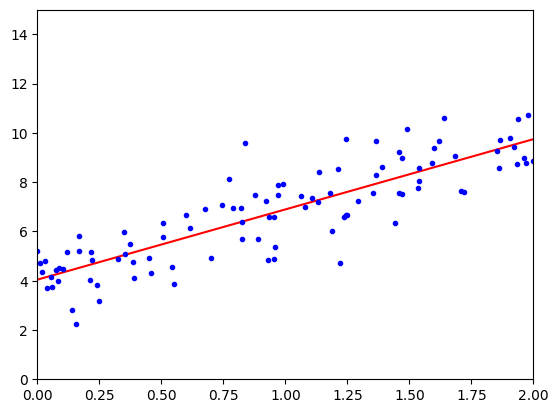

In [8]:
# Prediction vs data plot
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

-----

# Linear Regression on Scikit Learn

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[4.04276069],
       [9.74450343]])

In [10]:
# The LinearRegression class is based on the scipy.linalg.lstsq() function (the
# name stands for “least squares”), which you could call directly:

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.04276069],
       [2.85087137]])

In [12]:
# This algorithm works with the pseudoinverse form instead of the normal form
np.linalg.pinv(X_b).dot(y)

array([[4.04276069],
       [2.85087137]])

-----

# Gradient Descendent

In [13]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [14]:
# We found the same solution!
theta

array([[4.04276069],
       [2.85087137]])

----

# Stochastic Gradient Descend

In [15]:
# own made 
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [16]:
# Very close
theta

array([[4.0595922 ],
       [2.85523283]])

In [17]:
# Scikit learn SGD
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.01936106]), array([2.81391628]))

-----

# Polinomial Regression

In [18]:
# First you transform the original matrix of features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.92272134])

In [19]:
X_poly[0]

array([1.92272134, 3.69685734])

In [20]:
lin_reg = LinearRegression()

In [21]:
lin_reg.fit(X_poly, y)

LinearRegression()

In [22]:
lin_reg.intercept_, lin_reg.coef_

(array([3.96774449]), array([[ 3.11197834, -0.13634272]]))

----

# Learning Curves

In [29]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)   

In [25]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [26]:
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)